In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

2173


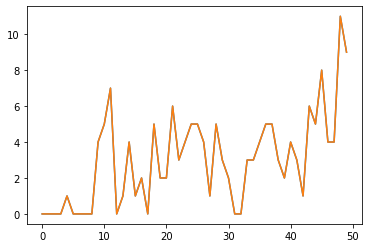

In [89]:

cols = ['79','169','313','158','211']

all_stats_df = pd.read_csv("tampines_stations_n_cluster_demand.csv")
clstr_175_dem = all_stats_df["clstr_175"]
all_stats_df = all_stats_df.drop("clstr_175",axis=1)


all_stats_df # all staions demand df

agg_stats = [] # aggregated staitons
agg_stats.append(0)
agg_stats.append(0)


for i in range(2,13027,6): # max = 13038
    tot = sum(all_stats_df.loc[i:i+5].sum())
    agg_stats.append(tot)

min_len = min(len(agg_stats),len(clstr_175_dem))
print(min_len)

agg_stats = np.array(agg_stats[:min_len])
clstr_175_dem = np.array(clstr_175_dem[:min_len])

plt.plot(agg_stats[:50])
plt.plot(clstr_175_dem[:50])
plt.show()


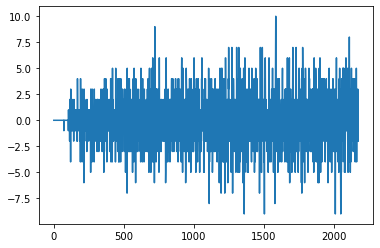

In [90]:
plt.plot(clstr_175_dem - agg_stats)
plt.show()


In [91]:

""" 
correct positive errors

"""

new_all_stats_df = all_stats_df

# corr_agg_stats = []
# corr_agg_stats.append(0)
# corr_agg_stats.append(0)

# idx=2
# for i in range(2,13027,6): # max = 13038
#     tot = sum(new_all_stats_df.loc[i:i+5].sum())
#     diff = clstr_175_dem[idx] - tot
#     # print("tot",tot)
#     # print("clstr_175_dem",clstr_175_dem[idx])
#     # print('\n')

#     if ( diff > 0):
#         j = np.random.randint(i,i+5)
#         k = np.random.choice(cols)
#         new_all_stats_df.loc[j][k]+=diff

#     tot = sum(new_all_stats_df.loc[i:i+5].sum())
#     corr_agg_stats.append(tot)
#     # print("tot",tot)
#     # print("clstr_175_dem",clstr_175_dem[idx])
#     # print('\n')
#     idx+=1


# plt.plot(clstr_175_dem - corr_agg_stats)
# plt.show()

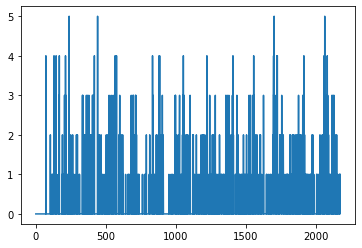

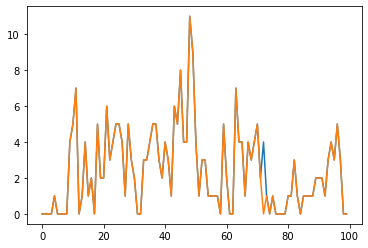

In [92]:

""" 
correct all errors

"""

#new_all_stats_df = all_stats_df

corr_agg_stats = []
corr_agg_stats.append(0)
corr_agg_stats.append(0)


idx=2
for i in range(2,13027,6): # max = 13038
    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    diff = clstr_175_dem[idx] - tot
    # print("tot",tot)
    # print("clstr_175_dem",clstr_175_dem[idx])
    # print('\n')

    if ( diff > 0):
        j = np.random.randint(i,i+5)
        k = np.random.choice(cols)
        new_all_stats_df.loc[j][k]+=diff

    elif( diff < 0):
        for j in range(i,i+6,1):
            for k in cols:
                if(new_all_stats_df.loc[j][k] != 0):
                    if ( new_all_stats_df.loc[j][k] + diff < 0):
                        diff = new_all_stats_df.loc[j][k] + diff
                        new_all_stats_df.loc[j][k] = 0
                    else:
                        new_all_stats_df.loc[j][k]+=diff



    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    corr_agg_stats.append(tot)
    # print("tot",tot)
    # print("clstr_175_dem",clstr_175_dem[idx])
    # print('\n')
    idx+=1


plt.plot(clstr_175_dem - corr_agg_stats)
plt.show()

plt.plot(clstr_175_dem[:100])
plt.plot(corr_agg_stats[:100])
plt.show()

In [93]:
len(np.where(new_all_stats_df<0)[0])

0

In [94]:
np.where(all_stats_df<0)[0]

array([], dtype=int64)

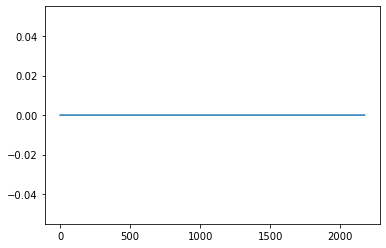

In [95]:
corr_agg_stats = []
corr_agg_stats.append(0)
corr_agg_stats.append(0)

idx=2
for i in range(2,13027,6): # max = 13038
    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    diff = clstr_175_dem[idx] - tot
    # print("tot",tot)
    # print("clstr_175_dem",clstr_175_dem[idx])
    # print('\n')

    if ( diff > 0):
        j = np.random.randint(i,i+5)
        k = np.random.choice(cols)
        new_all_stats_df.loc[j][k]+=diff

    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    corr_agg_stats.append(tot)
    # print("tot",tot)
    # print("clstr_175_dem",clstr_175_dem[idx])
    # print('\n')
    idx+=1


plt.plot(clstr_175_dem - corr_agg_stats)
plt.show()

In [97]:
np.where(new_all_stats_df<0)

(array([], dtype=int64), array([], dtype=int64))

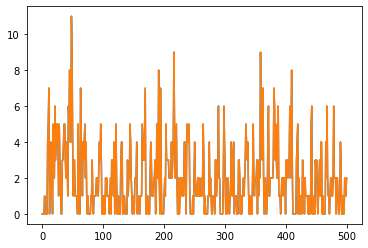

In [101]:

plt.plot(clstr_175_dem[0:500])
plt.plot(corr_agg_stats[0:500])
plt.show()

In [102]:
new_all_stats_df.to_csv("corrected_station_dem.csv")
## need to MANUALLY delete the 1st index column

2173


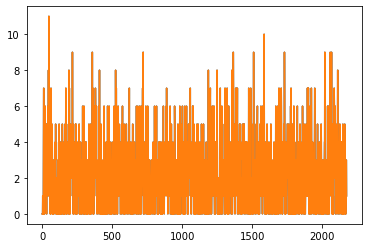

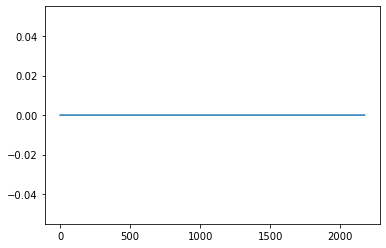

In [116]:
new_df = pd.read_csv("corrected_station_dem1.csv")

cols = ['79','169','313','158','211']

all_stats_df = new_df


all_stats_df # all staions demand df

agg_stats = [] # aggregated staitons
agg_stats.append(0)
agg_stats.append(0)


for i in range(2,13027,6): # max = 13038
    tot = sum(all_stats_df.loc[i:i+5].sum())
    agg_stats.append(tot)

min_len = min(len(agg_stats),len(clstr_175_dem))
print(min_len)

agg_stats = np.array(agg_stats[:min_len])
clstr_175_dem = np.array(clstr_175_dem[:min_len])

plt.plot(agg_stats)
plt.plot(clstr_175_dem)
plt.show()

plt.plot(agg_stats - clstr_175_dem)
plt.show()

2173


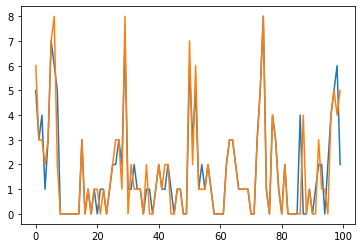

In [123]:
cols = ['79','169','313','158','211']

all_stats_df = pd.read_csv("tampines_stations_n_cluster_inflow.csv")
clstr_175_inf = all_stats_df["clstr_175"]
all_stats_df = all_stats_df.drop("clstr_175",axis=1)


all_stats_df # all staions inflow df

agg_stats = [] # aggregated staitons
agg_stats.append(0)
agg_stats.append(0)


for i in range(2,13027,6): # max = 13038
    tot = sum(all_stats_df.loc[i:i+5].sum())
    agg_stats.append(tot)

min_len = min(len(agg_stats),len(clstr_175_inf))
print(min_len)

agg_stats = np.array(agg_stats[:min_len])
clstr_175_inf = np.array(clstr_175_inf[:min_len])

plt.plot(agg_stats[400:500])
plt.plot(clstr_175_inf[400:500])
plt.show()

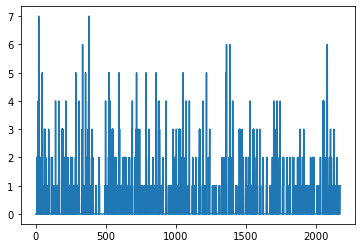

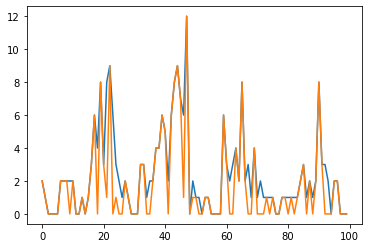

In [124]:
""" 
correct all errors

"""

new_all_stats_df = all_stats_df

corr_agg_stats = []
corr_agg_stats.append(2)
corr_agg_stats.append(1)


idx=2
for i in range(2,13027,6): # max = 13038
    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    diff = clstr_175_inf[idx] - tot
    # print("tot",tot)
    # print("clstr_175_inf",clstr_175_inf[idx])
    # print('\n')

    if ( diff > 0):
        j = np.random.randint(i,i+5)
        k = np.random.choice(cols)
        new_all_stats_df.loc[j][k]+=diff

    elif( diff < 0):
        for j in range(i,i+6,1):
            for k in cols:
                if(new_all_stats_df.loc[j][k] != 0):
                    if ( new_all_stats_df.loc[j][k] + diff < 0):
                        diff = new_all_stats_df.loc[j][k] + diff
                        new_all_stats_df.loc[j][k] = 0
                    else:
                        new_all_stats_df.loc[j][k]+=diff



    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    corr_agg_stats.append(tot)
    # print("tot",tot)
    # print("clstr_175_inf",clstr_175_inf[idx])
    # print('\n')
    idx+=1


plt.plot(clstr_175_inf - corr_agg_stats)
plt.show()

plt.plot(clstr_175_inf[:100])
plt.plot(corr_agg_stats[:100])
plt.show()

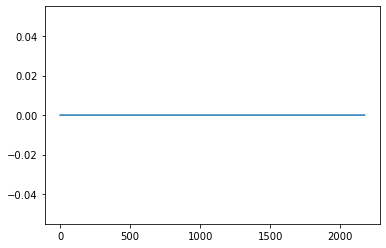

In [125]:
corr_agg_stats = []
corr_agg_stats.append(2)
corr_agg_stats.append(1)

idx=2
for i in range(2,13027,6): # max = 13038
    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    diff = clstr_175_inf[idx] - tot
    # print("tot",tot)
    # print("clstr_175_inf",clstr_175_inf[idx])
    # print('\n')

    if ( diff > 0):
        j = np.random.randint(i,i+5)
        k = np.random.choice(cols)
        new_all_stats_df.loc[j][k]+=diff

    tot = sum(new_all_stats_df.loc[i:i+5].sum())
    corr_agg_stats.append(tot)
    # print("tot",tot)
    # print("clstr_175_inf",clstr_175_inf[idx])
    # print('\n')
    idx+=1


plt.plot(clstr_175_inf - corr_agg_stats)
plt.show()

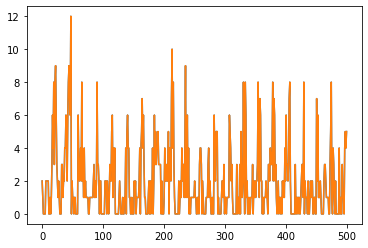

(array([], dtype=int64), array([], dtype=int64))

In [126]:
plt.plot(clstr_175_inf[0:500])
plt.plot(corr_agg_stats[0:500])
plt.show()


np.where(new_all_stats_df<0)

In [127]:
new_all_stats_df.to_csv("corrected_station_inf.csv") 
## need to MANUALLY delete the 1st index column

2173


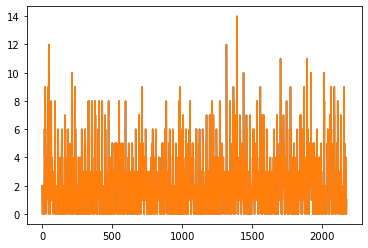

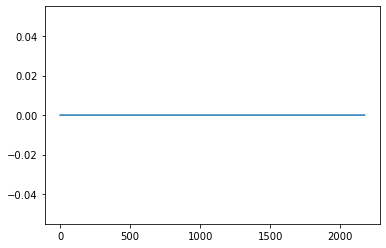

In [128]:
new_df = pd.read_csv("corrected_station_inf1.csv") 

cols = ['79','169','313','158','211']

all_stats_df = new_df


all_stats_df # all staions inflow df

agg_stats = [] # aggregated staitons
agg_stats.append(2)
agg_stats.append(1)


for i in range(2,13027,6): # max = 13038
    tot = sum(all_stats_df.loc[i:i+5].sum())
    agg_stats.append(tot)

min_len = min(len(agg_stats),len(clstr_175_inf))
print(min_len)

agg_stats = np.array(agg_stats[:min_len])
clstr_175_inf = np.array(clstr_175_inf[:min_len])

plt.plot(agg_stats)
plt.plot(clstr_175_inf)
plt.show()

plt.plot(agg_stats - clstr_175_inf)
plt.show()